## Dataset Description 
### the No-Show Appointments Dataset
The dataset contains records of over 110,000 medical apointments in Brazil. Each record describes a single apointment, including patient demographics, health conditions, scheduling details, and whether the patient attended or missed the apointment. The dataset is commonly used to analyze and predict factors that influence patient no-shows, such as age, waiting time, socioeconomic status, and reminder messages.

## Question(s) for Analysis
### Are reminder messages related to missing appointments?
### Is there a link between social security and missing appointments?
### Does geographical location have a link to not showing up for appointments?
### Does age and gender have a link  to not showing up fo ttendance?

## Import the Libraries
We need some libraries to complete this project

**Pandas**: For load dataset

**Numpy**: For calculations

**Matplotlib and Seaborn**: For the sake of the graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
# Data Wrangling


### Import the data

In [2]:
df = pd.read_csv('no_show_appointments.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### See all the columns

In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### See the information od the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### See the describe of the data

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Check if the data has null

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### See the unique values of the data

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


# Data Cleaning
 

### We need only date in ScheduledDay and AppointmentDay

In [8]:
df['AppointmentDay'] = df['AppointmentDay'].str.split('T').str[0]
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
df['ScheduledDay'] = df['ScheduledDay'].str.split('T').str[0]
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


### If you can see we have negative age

In [10]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


### Drop the negative age 

In [11]:
df = df[df['Age'] != -1]


### Check

In [12]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<a id='eda'></a>
# Exploratory Data Analysis

## Research Question 1 (Are reminder messages related to missing appointments?)

### This function for show plot

In [13]:
# X is obobject
# Y is Title
# Z is name X axis
def Display (X,Y,Z):
    plt.figure(figsize=(10, 6))
    X.plot(kind='bar')

    plt.title(Y)
    plt.xlabel(Z)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Check the number of SMS_received

In [14]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

### Plot how many received SMS or not and how many show or not

<Figure size 1000x600 with 0 Axes>

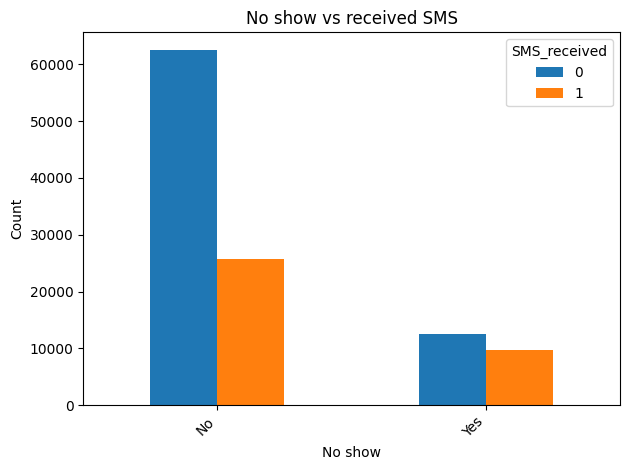

In [15]:
counts = df.groupby(['No-show', 'SMS_received']).size().unstack()

Display(counts, 'No show vs received SMS', 'No show')

### If you see the last plot it's illogical that most of those who attended didn't receive a text message.
### If you can see the dataset some people arrived on the same day they booked their appointment.
### Therefore, we need to separate them.

### For used that, firest I need copy data and split the day in AppointmentDay and ScheduledDay 

In [16]:
import warnings
warnings.simplefilter("ignore")

new_df = df
new_df['AppointmentDay'] = new_df['AppointmentDay'].str.split('-').str[2]
new_df['ScheduledDay'] = new_df['ScheduledDay'].str.split('-').str[2]

new_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,29,29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,29,29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,29,29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,29,29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,29,29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,03,07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,03,07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,27,07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,27,07,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Then need change the type to integer

In [17]:
new_df['AppointmentDay'] = new_df['AppointmentDay'].astype(int)
new_df['ScheduledDay'] = new_df['ScheduledDay'].astype(int)

new_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,29,29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,29,29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,29,29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,29,29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,29,29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,3,7,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,3,7,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,27,7,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,27,7,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Then need to separate those whose appointments are on the same day as the booking

In [18]:
df_1 = new_df[new_df['AppointmentDay'] - new_df['ScheduledDay'] != 0]
df_1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,9.598513e+13,5626772,F,27,29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,27,29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,27,29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,7.812456e+13,5629123,F,27,29,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,27,29,30,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,3,7,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,3,7,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,27,7,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,27,7,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Plot and see the results

<Figure size 1000x600 with 0 Axes>

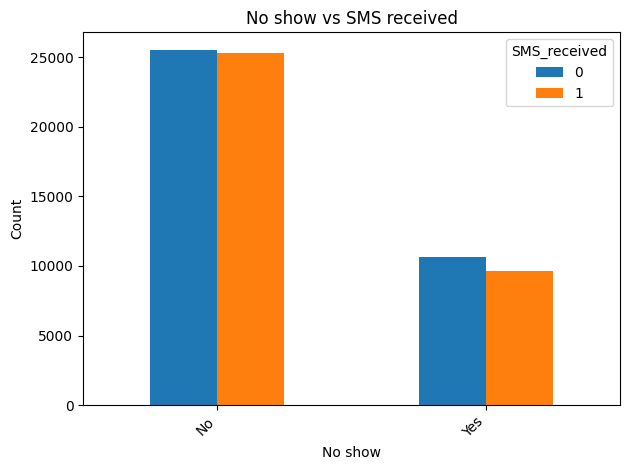

In [19]:
counts = df_1.groupby(['No-show', 'SMS_received']).size().unstack()

Display(counts, 'No show vs SMS received', 'No show')

### We can see that most of those who did not attend did not receive messages

### Let's try the same thing, but with the other group

In [20]:
df_2 = new_df[(new_df['AppointmentDay'] - new_df['ScheduledDay']) == 0]
df_2

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,29,29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,29,29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,29,29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,29,29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,29,29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,8.235996e+11,5786742,F,8,8,14,MARIA ORTIZ,0,0,0,0,0,0,No
110512,9.876246e+13,5786368,F,8,8,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,8.674778e+13,5785964,M,8,8,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110514,2.695685e+12,5786567,F,8,8,58,MARIA ORTIZ,0,0,0,0,0,0,No


<Figure size 1000x600 with 0 Axes>

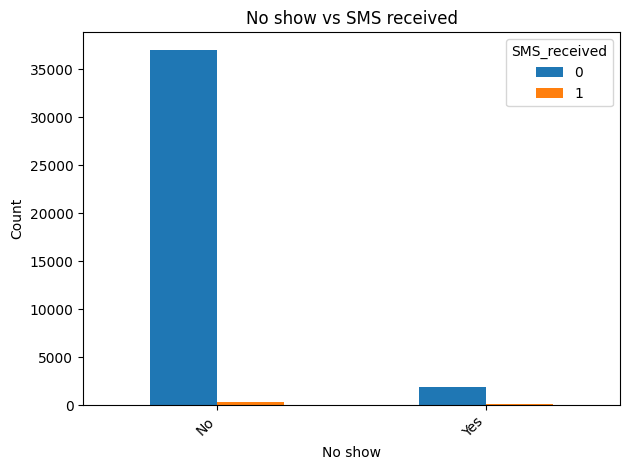

In [21]:
counts = df_2.groupby(['No-show', 'SMS_received']).size().unstack()

Display(counts, 'No show vs SMS received', 'No show')

>### We can conclude from this analysis that the people who achieved the highest attendance rate were those who arrived on the same day as the appointment booking

## Research Question 2  (Is there a link between social security and missing appointments?)

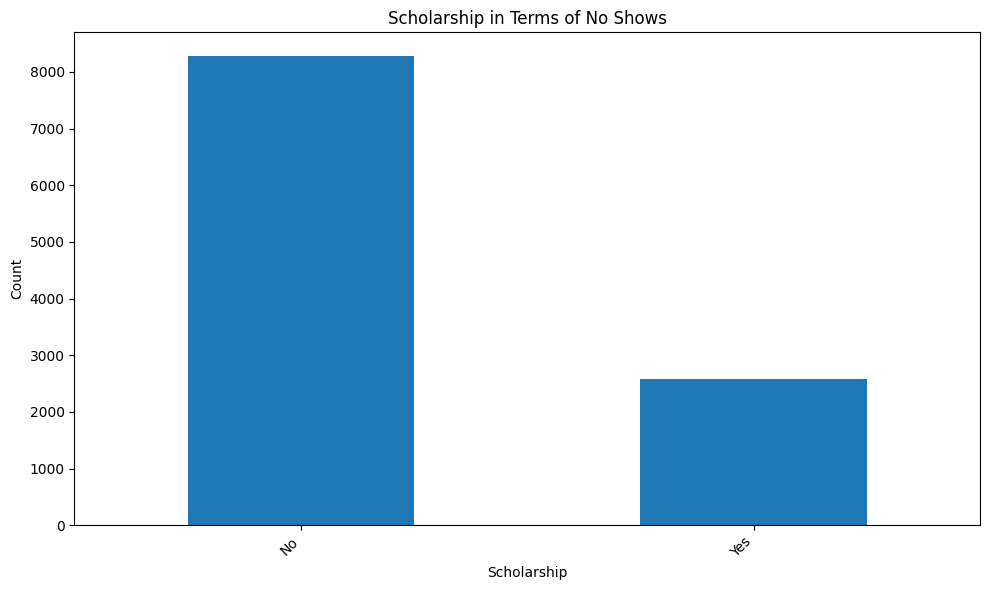

In [22]:
Scholarship = df.groupby('No-show')['Scholarship'].sum()
Title = 'Scholarship in Terms of No Shows'
xlabel = 'Scholarship'

Display(Scholarship, Title, xlabel)

>### We can see that most of those who attended had health insurance

## Research Question 3  (Does geographical location have a link to not showing up for appointments?)

### We only need those who did not attend

In [23]:
no_show_counts = (df[df['No-show'] == 'Yes'].groupby('Neighbourhood').size().sort_values(ascending=False))


### Now we are counting the top 15 neighborhoods where people don't show up for appointments

In [24]:
counts_top_15 = no_show_counts.head(15)
counts_top_15

Neighbourhood
JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
ILHA DO PRÍNCIPE      532
ANDORINHAS            521
SÃO PEDRO             515
SANTO ANDRÉ           508
SANTA MARTHA          496
dtype: int64

### Plot it

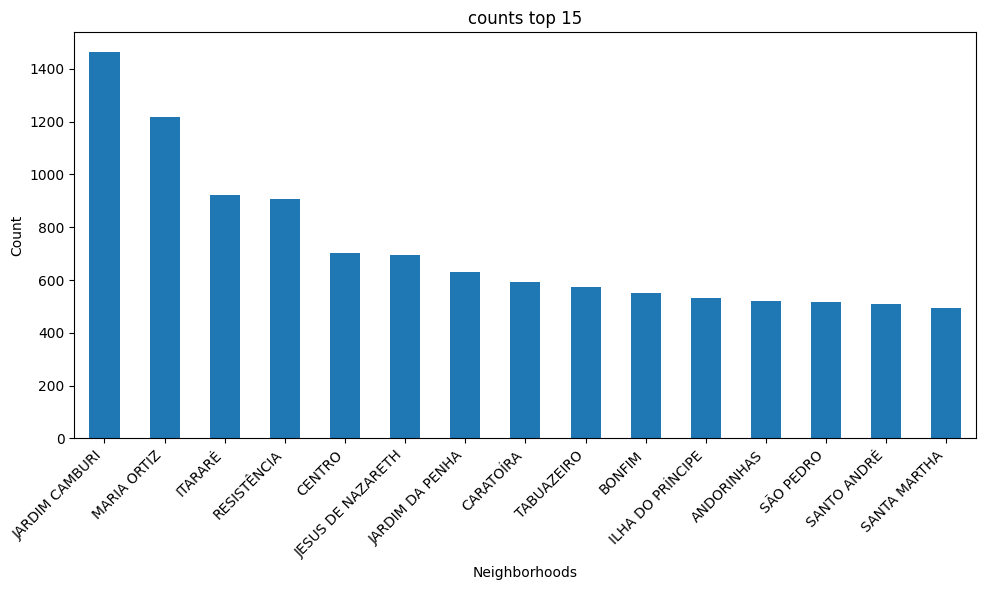

In [25]:
Display(counts_top_15, 'counts top 15', 'Neighborhoods')

### Now we are counting the less 15 neighborhoods where people don't show up for appointments

In [26]:
counts_last_15 = no_show_counts.tail(15)
counts_last_15 = counts_last_15.sort_values(ascending=True)
counts_last_15

Neighbourhood
AEROPORTO                       1
ILHAS OCEÂNICAS DE TRINDADE     2
ILHA DO FRADE                   2
ILHA DO BOI                     3
PONTAL DE CAMBURI              12
MORADA DE CAMBURI              16
SEGURANÇA DO LAR               28
NAZARETH                       29
UNIVERSITÁRIO                  32
SANTA HELENA                   37
HORTO                          42
DE LOURDES                     47
FRADINHOS                      48
ANTÔNIO HONÓRIO                50
ENSEADA DO SUÁ                 52
dtype: int64

### Plot it

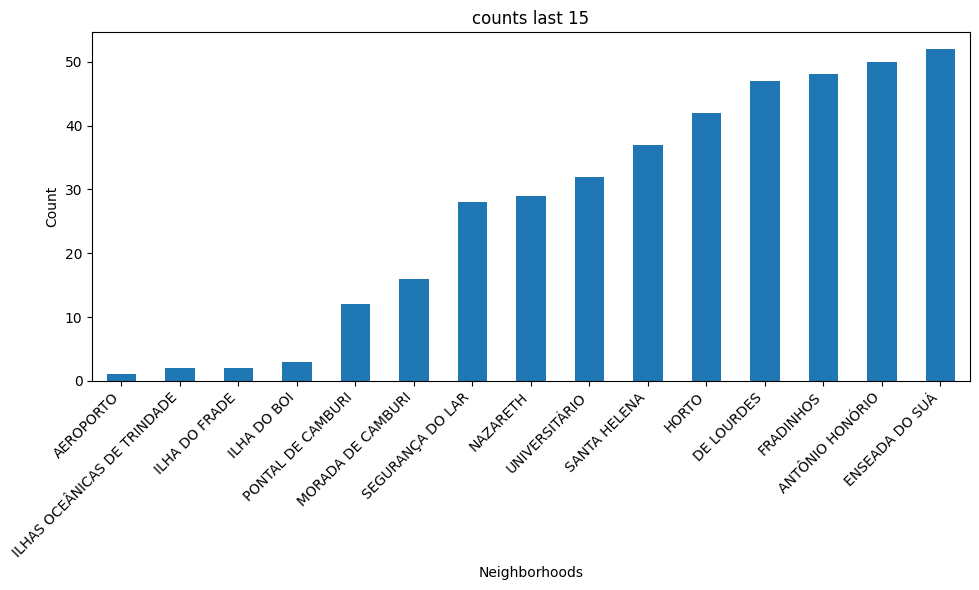

In [27]:
Display(counts_last_15, 'counts last 15', 'Neighborhoods')

>### I researched these neighborhoods, including their population, geographical location, and socioeconomic status, I concluded that the smaller the population of the neighborhood, the higher the attendance at appointments

## Research Question 4  (Does age and gender have a link to not showing up fo ttendance?)

### Check details about Genders and No Show

In [28]:
age_gender_attendance = (df.groupby(['Gender', 'No-show']).agg(count=('Age', 'count'),mean_age=('Age', 'mean'),median_age=('Age', 'median'),min_age=('Age', 'min'),max_age=('Age', 'max')))

age_gender_attendance


count   mean_age  median_age  min_age  max_age
Gender No-show                                                
F      No       57245  39.591126        40.0        0      115
       Yes      14594  36.162190        34.0        0      115
M      No       30962  34.461372        34.0        0      100
       Yes       7725  30.833010        28.0        0       97

### Marge in one value

In [29]:
gender_attendance = (
    df
    .groupby(['Gender', 'No-show'])
    .size()
    .unstack(fill_value=0)
)

gender_attendance


No-show,No,Yes
Gender,,
F,57245,14594
M,30962,7725


### How many male and female

<Figure size 1000x600 with 0 Axes>

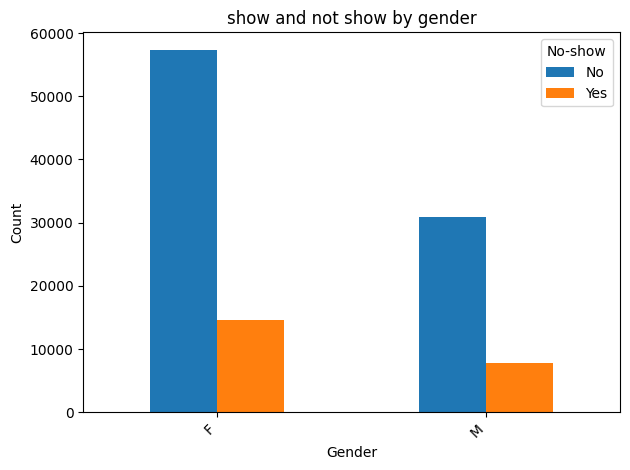

In [30]:
Display(gender_attendance, 'show and not show by gender', 'Gender')

### Distribution of ages according to show and not show

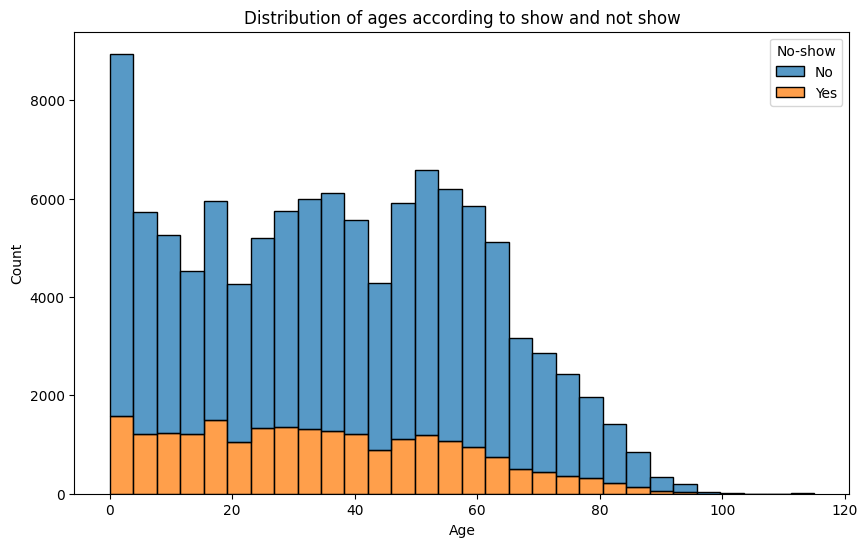

In [31]:

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Age',
    hue='No-show',
    bins=30,
    multiple='stack'
)

plt.title('Distribution of ages according to show and not show')
plt.show()


### Distribution of people by gender and show

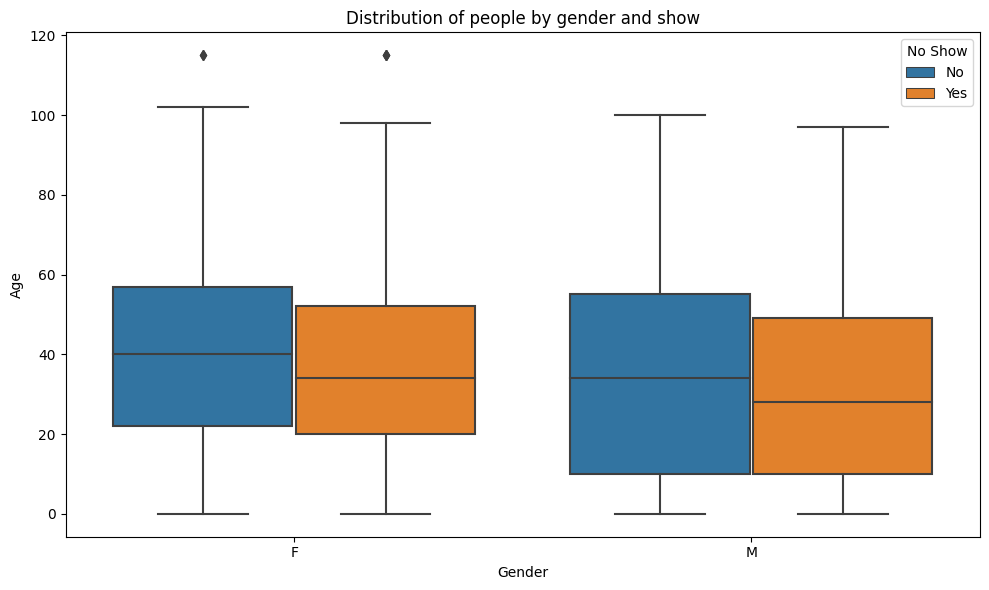

In [32]:

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Gender',
    y='Age',
    hue='No-show'
)

plt.title('Distribution of people by gender and show')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='No Show')
plt.tight_layout()
plt.show()


>### We can see that most of those who attend their appointments are women, which is why women live longer

<a id='conclusions'></a>
## Conclusions
## Results

>90% of the appointments were scheduled by patients who Do Not Receive Scholarships.

>Patients who Receive Scholarship are more likely to be No-Show when compared to patients who Do Not Receive Scholarship.

>Most of those booking appointments are women.

>Patients Age has no effect on the likelihood of a No-Show.

>Patients who have Received a SMS are more likely to be a No-Show when compared to patients who Have Not Received a SMS.


## Limitations
The conclusion drawn for SMS Received, is based only on the visualisation of the data, and it is not drawn from any other details. The conclusion seems to be counter-intutive, as Patients who receive SMS are more likely of a No-Show. This maybe due to the SMS being sent very early or very close to the appointment.

## Save the code

In [33]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 730573 bytes to Investigate_a_Dataset.html
